In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [7]:
# Load the Dataset
googleplaystore = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\googleplaystore.csv")
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Basic Data Understanding
df.shape

df.columns

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
#Checking Missing Values
googleplaystore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
# Data Cleaning
# 1. Remove Incorrect Row

googleplaystore = googleplaystore[googleplaystore['Rating'] <= 5]


In [11]:
# Convert Reviews to Integer
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype(int)

In [13]:
# 2. Clean Installs Column
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+','')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',','')
googleplaystore['Installs'] = googleplaystore['Installs'].astype(int)

In [14]:
# 3. Convert Price Column
googleplaystore['Price'] = googleplaystore['Price'].str.replace('$','')
googleplaystore['Price'] = googleplaystore['Price'].astype(float)

In [16]:
# 4. Convert Size Column 
def size_to_mb(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k','')) / 1024
    else:
        return np.nan

googleplaystore['Size_MB'] = googleplaystore['Size'].apply(size_to_mb)

In [17]:
# Handling Missing Values
# 1. Drop very small missing columns
googleplaystore.dropna(subset=['Type','Content Rating','Android Ver','Current Ver'], inplace=True)


In [18]:
# 2. Fill Missing Ratings with Category Mean
googleplaystore['Rating'] = googleplaystore.groupby('Category')['Rating'].transform(
    lambda x: x.fillna(x.mean())
)

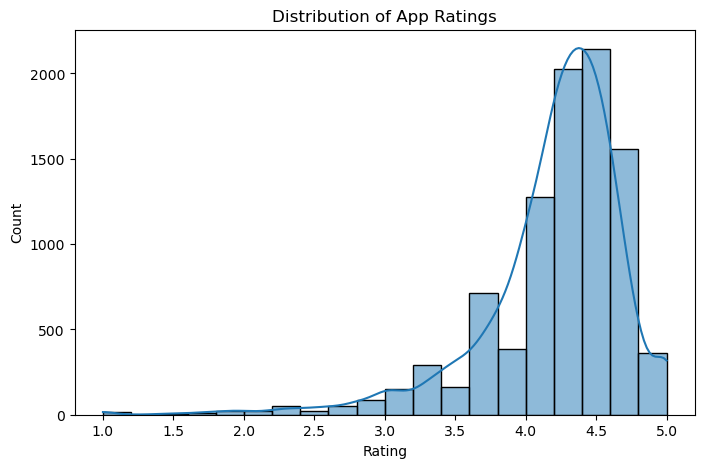

In [19]:
# Data Visualization
# 1, Distribution of Ratings
plt.figure(figsize=(8,5))
sns.histplot(googleplaystore['Rating'], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.show()

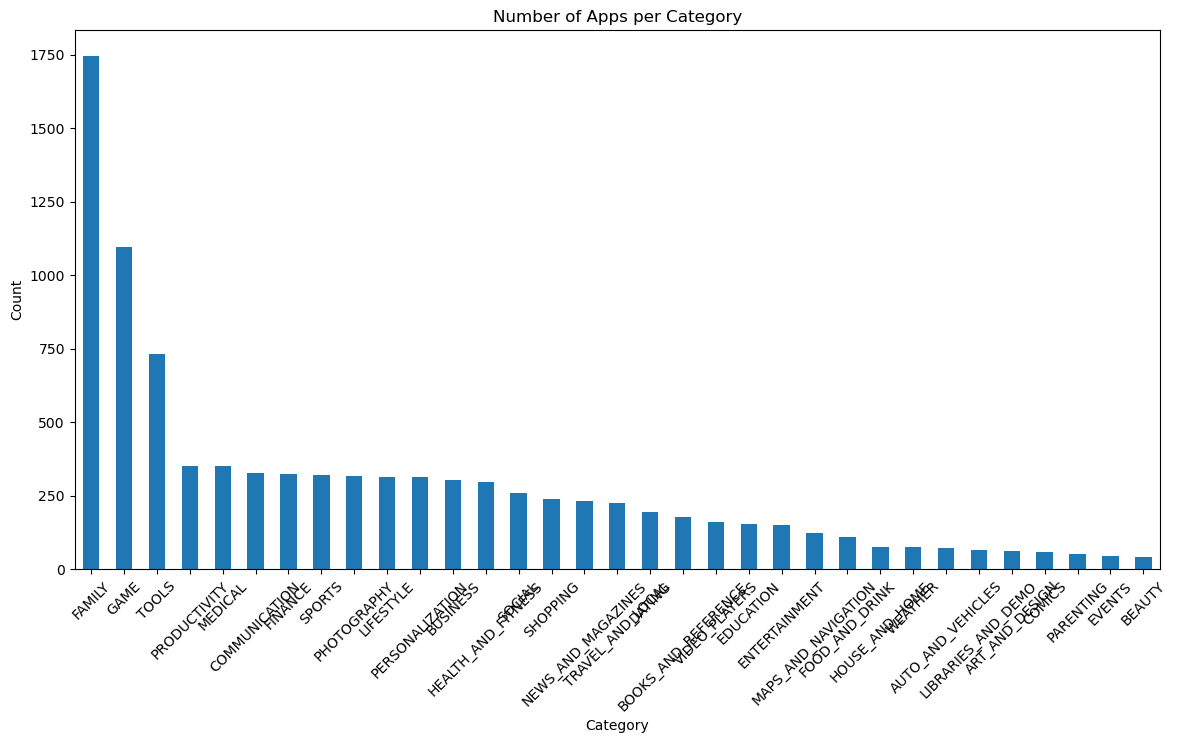

In [21]:
# 2. Apps Count by Category
plt.figure(figsize=(14,7))
googleplaystore['Category'].value_counts().plot(kind='bar')
plt.title("Number of Apps per Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

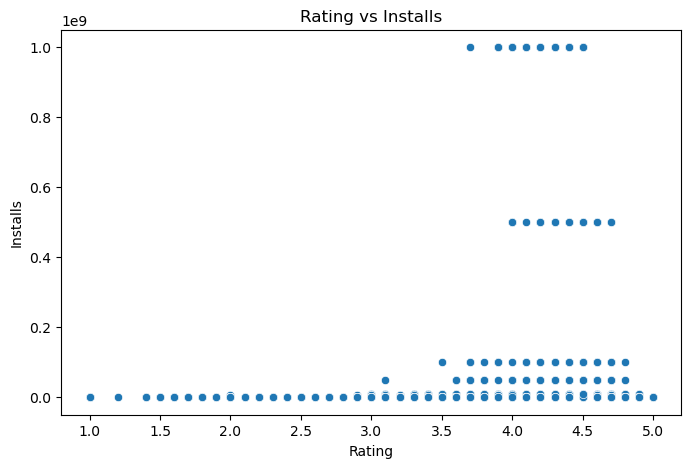

In [22]:
# 3. Rating vs Installs
plt.figure(figsize=(8,5))
sns.scatterplot(x='Rating', y='Installs', data=googleplaystore)
plt.title("Rating vs Installs")
plt.show()

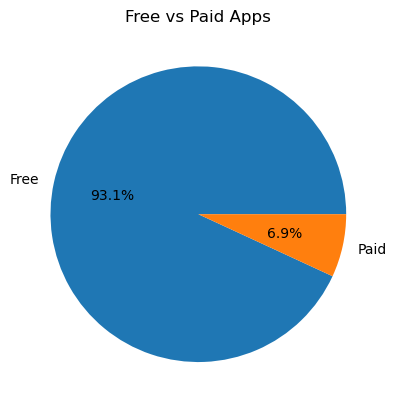

In [23]:
# 4. Paid vs Free Apps
googleplaystore['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()

In [24]:
# Key Analysis
# 1. Average Rating by Category
googleplaystore.groupby('Category')['Rating'].mean().sort_values(ascending=False)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.377049
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335256
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
HOUSE_AND_HOME         4.197368
FAMILY                 4.192383
PHOTOGRAPHY            4.192114
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.189143
LIBRARIES_AND_DEMO     4.179688
FOOD_AND_DRINK         4.166972
COMMUNICATION          4.158537
COMICS                 4.155172
NEWS_AND_MAGAZINES     4.132189
FINANCE                4.131889
ENTERTAINMENT          4.126174
BUSINESS               4.121452
TRAVEL_AND_LOCAL       4.109292
LIFESTYLE              4.094904
VIDEO_PLAYERS          4.063750
MAPS_AND_NAVIGATION    4.051613

In [25]:
# 2. Top 10 Most Installed Apps
googleplaystore[['App','Installs']].sort_values(by='Installs', ascending=False).head(10)

,App,Installs
451,Gmail,1000000000
3665,YouTube,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
386,Hangouts,1000000000
391,Skype - free IM & video calls,1000000000
3687,Google Play Movies & TV,1000000000
411,Google Chrome: Fast & Secure,1000000000
3736,Google News,1000000000
3765,Google News,1000000000
865,Google Play Games,1000000000


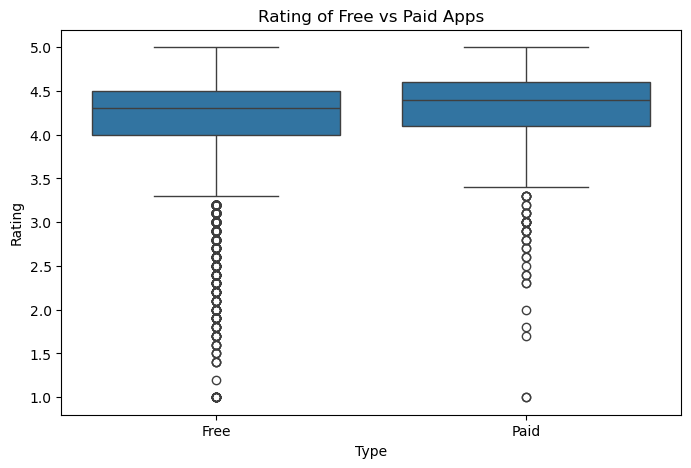

In [26]:
# Price vs Rating
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=googleplaystore)
plt.title("Rating of Free vs Paid Apps")
plt.show()

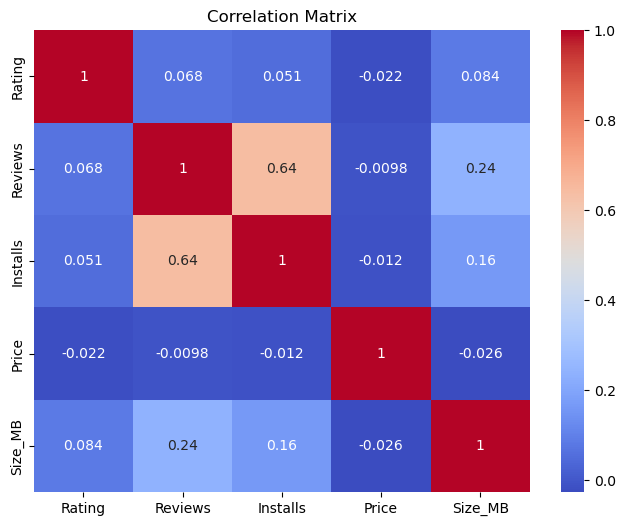

In [28]:
# Correlation Analysis
numeric_df = googleplaystore[['Rating','Reviews','Installs','Price','Size_MB']]

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [31]:
# Sentiment Analysis of Google Play Store User Reviews
# 1. Load User Reviews Dataset
reviews_df = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\googleplaystore_user_reviews.csv")

reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [32]:
# Dataset Overview
reviews_df.info()

reviews_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [33]:
# Data Cleaning
# 1. Remove Missing Reviews
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

In [34]:
# Sentiment Distribution
reviews_df['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

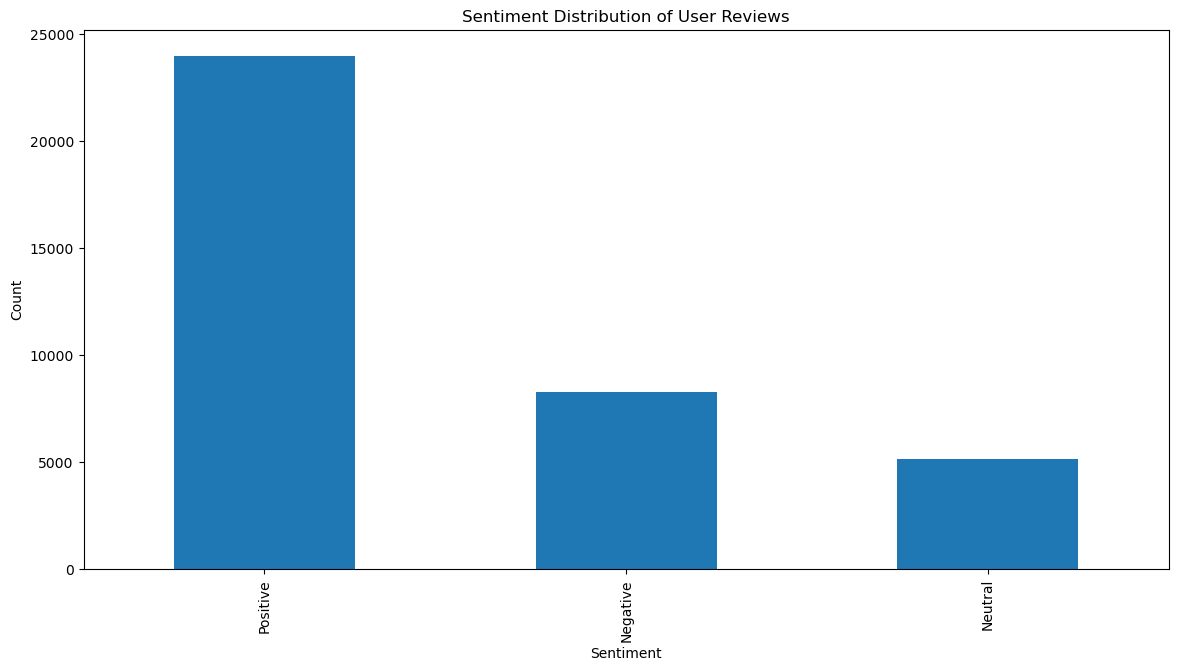

In [37]:
# visualizing Sentiment Distribution
plt.figure(figsize=(14,7))
reviews_df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution of User Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [39]:
# Convert Date Column
googleplaystore['Last Updated'] = pd.to_datetime(googleplaystore['Last Updated'], errors='coerce')

googleplaystore[['Last Updated']].head()

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20


In [40]:
# Remove Invalid Ratings
googleplaystore = googleplaystore[(googleplaystore['Rating'] >= 1) & (df['Rating'] <= 5)]

C:\Users\rohit\AppData\Local\Temp\ipykernel_5076\1060081782.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  googleplaystore = googleplaystore[(googleplaystore['Rating'] >= 1) & (df['Rating'] <= 5)]


In [41]:
# Create Time Features
googleplaystore['Update_Year'] = googleplaystore['Last Updated'].dt.year
googleplaystore['Update_Month'] = googleplaystore['Last Updated'].dt.month

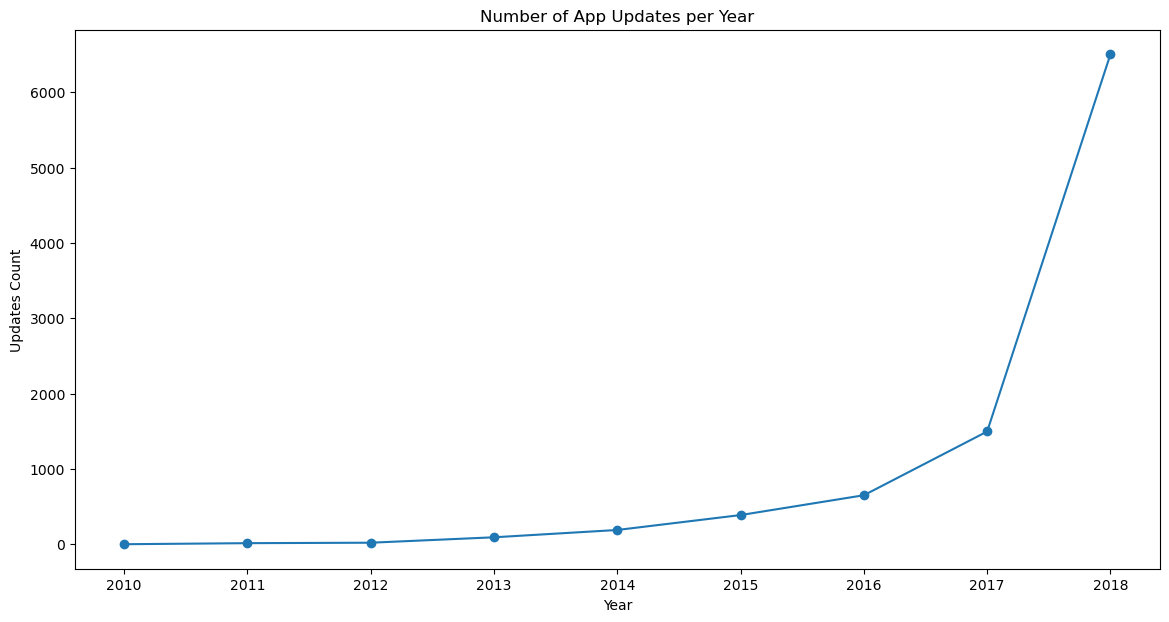

In [43]:
# Number of App Updates Per Year
updates_per_year = googleplaystore['Update_Year'].value_counts().sort_index()

plt.figure(figsize=(14,7))
plt.plot(updates_per_year.index, updates_per_year.values, marker='o')
plt.title("Number of App Updates per Year")
plt.xlabel("Year")
plt.ylabel("Updates Count")
plt.show()

In [66]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 3. Basic Data Cleaning
googleplaystore = googleplaystore[
    (googleplaystore['Rating'] >= 1) & (googleplaystore['Rating'] <= 5)
]
# 4. Clean Required Columns
googleplaystore['Reviews'] = pd.to_numeric(
    googleplaystore['Reviews'], errors='coerce'
)
googleplaystore['Installs'] = googleplaystore['Installs'].astype(str)
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+','')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',','')
googleplaystore['Installs'] = pd.to_numeric(
    googleplaystore['Installs'], errors='coerce'
)
googleplaystore['Price'] = googleplaystore['Price'].astype(str)
googleplaystore['Price'] = googleplaystore['Price'].str.replace('$','')
googleplaystore['Price'] = googleplaystore['Price'].astype(float)
# 5. Convert Size Column
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k','')) / 1024
    else:
        return np.nan
googleplaystore['Size_MB'] = googleplaystore['Size'].astype(str).apply(convert_size)
# 6. Select Features for Model
model_data = googleplaystore[
    ['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']
]
model_data.dropna(inplace=True)
# 7. Split Features and Target
X = model_data.drop('Rating', axis=1)
y = model_data['Rating']
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# 9. Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
# 10. Prediction
y_pred = lr.predict(X_test)
# 11. Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))




MAE: 0.3746487700862202
RMSE: 0.5260348029946603
R2 Score: 0.004866339514713713


C:\Users\rohit\AppData\Local\Temp\ipykernel_5076\2259014370.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(inplace=True)


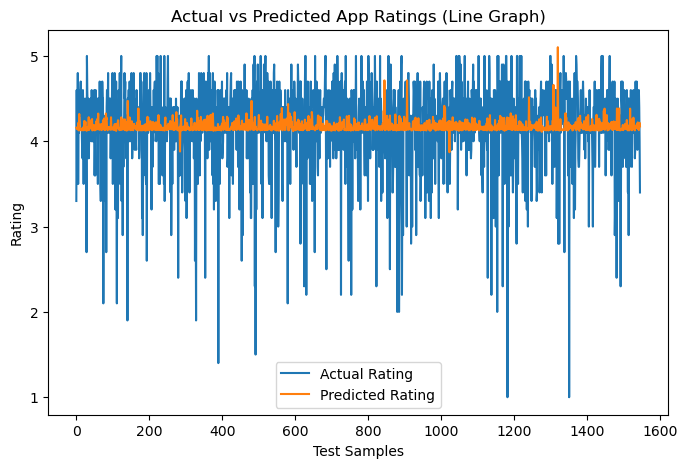

In [68]:
# Actual vs Predicted Ratings
y_test_sorted = y_test.reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred).reset_index(drop=True)

plt.figure(figsize=(8,5))
plt.plot(y_test_sorted, label="Actual Rating")
plt.plot(y_pred_sorted, label="Predicted Rating")
plt.xlabel("Test Samples")
plt.ylabel("Rating")
plt.title("Actual vs Predicted App Ratings (Line Graph)")
plt.legend()
plt.show()
